In [2]:
import matplotlib.pyplot as plt
import numpy as np
import casperfpga
import time
from lwa_f import snap2_fengine
#from lwautils import lwa_arx 
import pandas as pd
from cr_functions import *
import struct
import math
from scipy import special as sp
from scipy import optimize as oz
from scipy import stats as st

Are the trigger and veto roles swapped??

In [23]:
#TODO: put this in library
def get_trigger_and_veto_rate(casperbrd):
    byts = casperbrd.read("cosmic_ray_core_and_veto_rate",2*4,0)
    veto = byts[:4]
    core = byts[4:]
    return int.from_bytes(core,'big'), int.from_bytes(veto,'big')

In [3]:
fpgfile="/home/ubuntu/kplant/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2021-10-04_1837.fpg"
brdname='snap01'
#load firmware and initialize etc
brd=snap2_fengine.Snap2Fengine(brdname)
brd.program(fpgfile)

casperbrd = casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport)

2021-11-04 16:59:45,557 - lwa_f.blocks.block:snap01 - WARNING -  - hostname (10.40.0.157) couldn't be turned into integer serial
2021-11-04 16:59:45,860 - lwa_f.blocks.block:snap01 - INFO - adc - Detected FMC ADC board on port 0
2021-11-04 16:59:46,194 - lwa_f.blocks.block:snap01 - INFO - adc - Detected FMC ADC board on port 1
2021-11-04 16:59:46,210 - lwa_f.snap2_fengine:snap01 - INFO - Loading firmware /home/ubuntu/kplant/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2021-10-04_1837.fpg to snap01
2021-11-04 17:00:11,473 - lwa_f.blocks.block:snap01 - WARNING -  - hostname (10.40.0.157) couldn't be turned into integer serial
2021-11-04 17:00:11,816 - lwa_f.blocks.block:snap01 - INFO - adc - Detected FMC ADC board on port 0
2021-11-04 17:00:12,153 - lwa_f.blocks.block:snap01 - INFO - adc - Detected FMC ADC board on port 1


In [4]:
setup_data_source(casperbrd,"adc")
brd.initialize(read_only=False)
brd.sync.arm_sync()
brd.sync.sw_sync()
setup_ethernet(brdname,casperbrd,fpgfile,'lwacr',100)
#enable ethernet
setvalue(casperbrd,'eth_enable','cr_registers.xlsx',1)


Data source set to adc
2021-11-04 17:02:47,660 - lwa_f.snap2_fengine:snap01 - INFO - Initializing block (writable): fpga
2021-11-04 17:02:47,661 - lwa_f.snap2_fengine:snap01 - INFO - Initializing block (writable): adc
2021-11-04 17:02:47,665 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 0: Setting clock source to 1
2021-11-04 17:02:47,673 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 1: Setting clock source to 1
2021-11-04 17:02:47,680 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 board 0: Setting clock source to 1
2021-11-04 17:02:47,687 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 board 1: Setting clock source to 1
2021-11-04 17:02:57,577 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 0 clock rates: [490747637, 98208975, 98281303, 0, 0]
2021-11-04 17:02:57,578 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 0: MMCM locked
2021-11-04 17:02:58,590 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 board 1 clock rates: [490703763, 98168989, 98239334

2021-11-04 17:03:10,741 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 data lane delays:
[[384, 384, 392, 368, 384, 376, 376, 376], [384, 368, 368, 360, 368, 368, 360, 360], [352, 352, 352, 352, 352, 352, 352, 368], [368, 376, 360, 368, 368, 360, 368, 360], [360, 352, 360, 368, 368, 360, 360, 360], [360, 360, 368, 360, 352, 344, 344, 352], [384, 360, 368, 368, 368, 376, 360, 368], [424, 416, 416, 416, 416, 424, 432, 416]]
2021-11-04 17:03:10,742 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 0 data lane slacks:
[[40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 32, 40, 40, 32, 32], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 32, 40, 40, 32, 40, 32], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 32, 40, 40, 40, 32, 40, 40], [48, 40, 40, 40, 40, 40, 40, 40]]
2021-11-04 17:03:10,743 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXX
2021-11-04 17:03:10,744 - lwa_f.blocks.block:snap01 - INF

2021-11-04 17:03:10,781 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXX


2021-11-04 17:03:10,782 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXX
2021-11-04 17:03:10,785 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXX
2021-11-04 17:03:10,785 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXX
2021-11-04 17:03:10,786 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXX
2021-11-04 17:03:10,787 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXX
2021-11-04 17:03:10,787 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX-----|-----XXXXX
2021-11-04 17:03:10,788 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 1:    XXXXXXXX

2021-11-04 17:03:22,235 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 data lane delays:
[[304, 304, 304, 312, 296, 296, 288, 312], [288, 288, 288, 288, 288, 296, 288, 288], [296, 288, 288, 312, 296, 304, 296, 288], [328, 344, 328, 336, 336, 344, 336, 336], [280, 280, 280, 288, 280, 280, 280, 280], [328, 320, 320, 320, 328, 320, 328, 328], [288, 272, 280, 296, 280, 272, 272, 280], [272, 280, 280, 264, 272, 272, 272, 272]]
2021-11-04 17:03:22,235 - lwa_f.blocks.block:snap01 - INFO - adc - FMC 1 data lane slacks:
[[48, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 32, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 48, 40, 40, 40], [48, 48, 48, 40, 40, 40, 40, 40], [40, 32, 32, 32, 40, 40, 40, 40], [40, 32, 40, 40, 32, 32, 32, 32], [40, 40, 40, 40, 40, 40, 40, 40]]
2021-11-04 17:03:22,236 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX-----|-----XXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,237 - lwa_f.blocks.block:snap01 - INF

2021-11-04 17:03:22,266 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,267 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,267 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,268 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,269 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,269 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 6, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,270 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 0:    XXXXXXXX

2021-11-04 17:03:22,271 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,272 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,273 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,273 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:22,274 - lwa_f.blocks.block:snap01 - INFO - adc - Chip 7, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-11-04 17:03:26,710 - lwa_f.snap2_fengine:snap01 - INFO - Initializing block (writable): sync
2021-11-04 17:03:26,724 - lwa_f.snap2_fengine:snap01 - INFO - Initializing block (writable): noise
2021-11-04 17:03:26,731 - lwa_f.snap2_fengine:sn

Set up trigger

In [39]:
w=10 #this value doesn't matter because I'm interested in one antenna only
n=0 #only require one antenna to trigger

t= 511 #initially set a high value so it doesn't trigger right away
setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t**2))

setvalue(casperbrd,"trigger_window","cr_registers.xlsx",w)#set window length
setvalue(casperbrd,"antenna_number_thresh","cr_registers.xlsx",n)#set number threshold
# set all antennas to participate 
setvalue(casperbrd,"trigger_antennas1","cr_registers.xlsx",(2**32)-1)
setvalue(casperbrd,"trigger_antennas2","cr_registers.xlsx",(2**32)-1)
setvalue(casperbrd,"veto_antennas1","cr_registers.xlsx",(2**32)-1)
setvalue(casperbrd,"veto_antennas2","cr_registers.xlsx",(2**32)-1)
#enable the coincidence trigger
setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)


I will re-run the following cell for various power thresholds until I get a trigger read out.  I don't need to set the veto threshold because I'm not using the veto here.

In [40]:
t=0
setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t**2))


In [41]:
trigger, veto = get_trigger_and_veto_rate(casperbrd)#read result
print(trigger)
print(veto)

20
0


Could Try Sending Frequent Software triggers for comparison

In [44]:
#send software trigger
software_trigger(casperbrd,1)

Packetizer formed 64 packets
Board successfully returned to listening state after readout
Readout took 22848 clock cycles
Packetizer never overflowed
Ethernet block almost-full counter incremented by 0


43.1159824279659


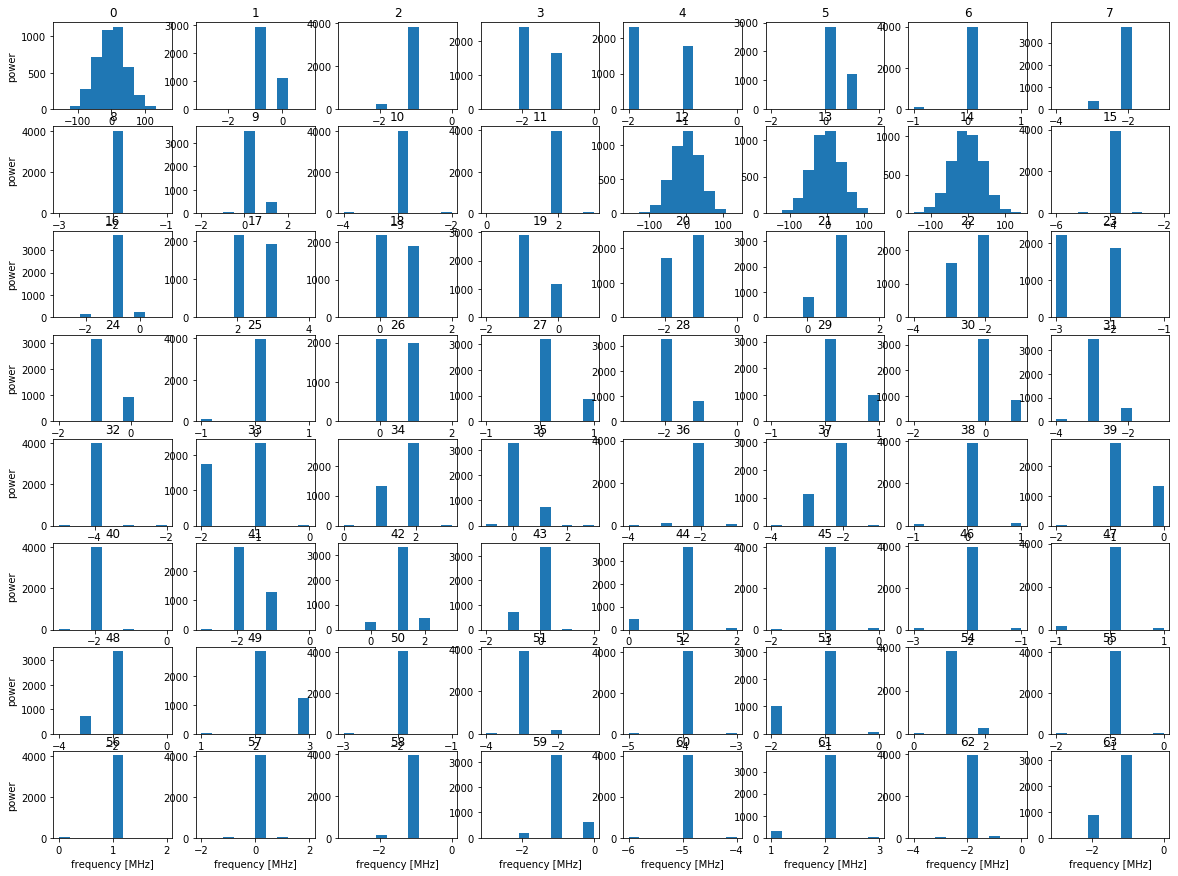

In [45]:
snapshotdir="/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/rfbotany"
snapshot=np.load(snapshotdir+"single_board_snapshot1636128248.2211628.npy")
fbins=np.linspace(0,197/2,int(1+4096/2))
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    plt.hist(snapshot[:,i+4])
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')
print(np.std(snapshot[:,0+4]))


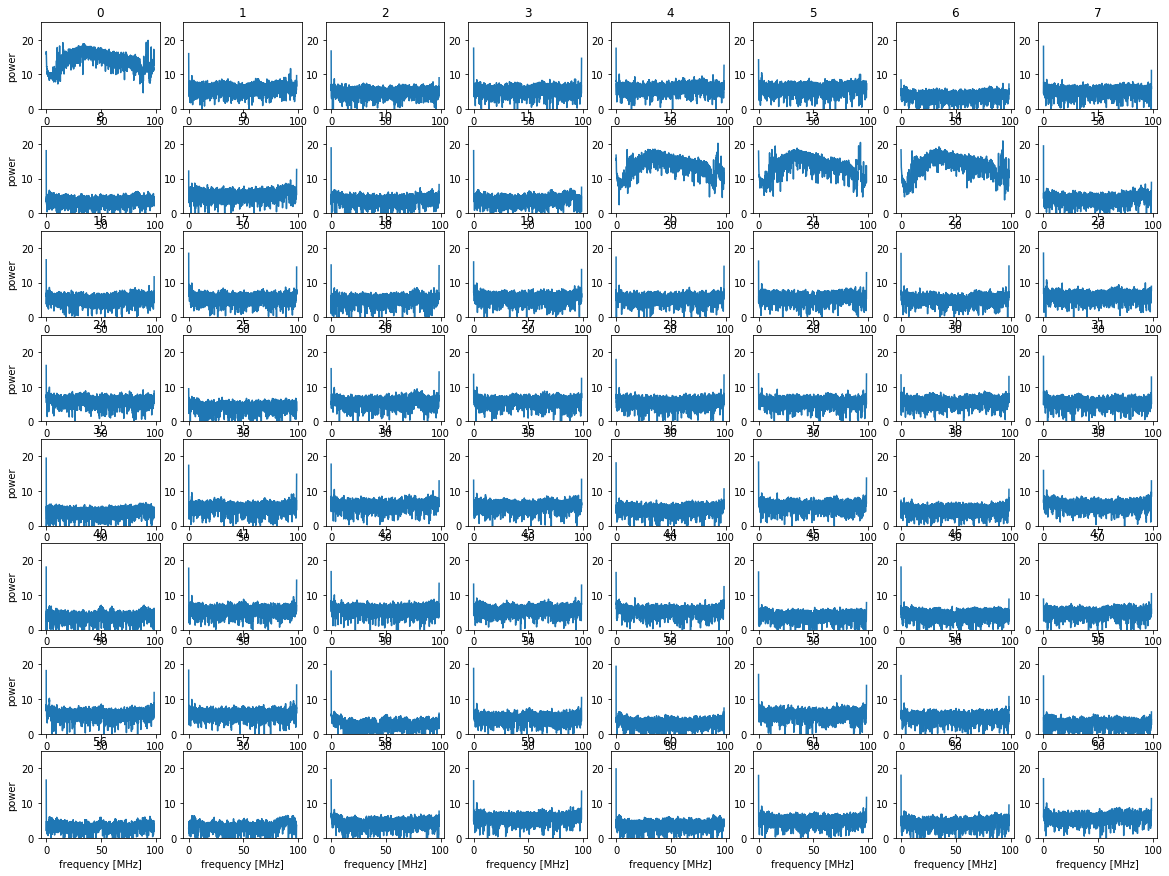

In [46]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

In [50]:
#This snapshot was recorded sending a constant for each timeseries.  
#I can use this to look up which order the antennas are in
indexsnapshot = np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/temp/single_board_snapshot1631823914.5523858.npy")
for antennaindex in [0,12,13,14]:
    print(antennaindex, indexsnapshot[0,antennaindex+4])
#temp/single_board_snapshot1631823914.5523858.npy

0 15.0
12 3.0
13 2.0
14 1.0


I have signals on 0, 12, 13, 14 which is digital inputs 15, 3, 2, 1. On the paper from Mark, antennas 9A, 9B, 45A, 45B are connected to digital inputs 2, 3, 0, 1, respectively. 

Mark remembered that during the end-to-end tests it appeared that inputs 0 and 15 were swapped. That means that the following mapping is would be correct:
FPGA channel    Antenna/Polarization

 2    9A
 
 3    9B
 
 15   45A
 
 1     45B
 

In [109]:
antnames=['45A', '9B', '9A', '45B']

In [55]:
test='noplant1/'

In [70]:
def process_test_all_ants(test):
    basedir="/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/rfbotany/"

    with open(basedir+test+"ls.txt") as f:
        fnames=f.readlines()
    basename=basedir+test
    Nant=64
    Nsnapshot=len(fnames) -1

    #kurtosis
    kurtosis=np.zeros((Nsnapshot,Nant))

    for j in range(Nsnapshot):
        fname=fnames[j+1][:-1]
        snapshot=np.load(basename+fname)
        for i in range(Nant):
            kurtosis[j,i]=st.kurtosis(snapshot[:,i+4])

    #standard deviations
    sdevs=np.zeros((Nsnapshot,Nant))

    for j in range(Nsnapshot):
        fname=fnames[j+1][:-1]
        snapshot=np.load(basename+fname)
        for i in range(Nant):
            sdevs[j,i]=np.std(snapshot[:,i+4])

    plt.figure(figsize=(20,15))
    for i in range(64):
        plt.subplot(8,8,1+i)
        plt.plot(kurtosis[:,i])
        if i > 55:
            plt.xlabel('Time index')
        if i%8==0:
            plt.ylabel('Kurtosis')

    plt.figure(figsize=(10,10))
    for i in range(64):
        plt.plot(sdevs[:,i])
        plt.xlabel("snapshot")
        plt.ylabel("Standard Deviation of Timeseries")
    plt.show()

In [95]:
def process_test(test,antennas):
    basedir="/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/rfbotany/"

    with open(basedir+test+"ls.txt") as f:
        fnames=f.readlines()
    basename=basedir+test
    Nant=64
    Nsnapshot=len(fnames) -1

    #kurtosis
    kurtosis=np.zeros((Nsnapshot,Nant))

    for j in range(Nsnapshot):
        fname=fnames[j+1][:-1]
        snapshot=np.load(basename+fname)
        for i in antennas:
            kurtosis[j,i]=st.kurtosis(snapshot[:,i+4])

    #standard deviations
    sdevs=np.zeros((Nsnapshot,Nant))

    for j in range(Nsnapshot):
        fname=fnames[j+1][:-1]
        snapshot=np.load(basename+fname)
        for i in antennas:
            sdevs[j,i]=np.std(snapshot[:,i+4])

    plt.figure(figsize=(10,10))
    for i in antennas:
        plt.plot(kurtosis[:,i],label=str(i))
        plt.xlabel("snapshot index")
        plt.ylabel("Kurtosis")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,10))
    for i in antennas:
        plt.plot(sdevs[:,i],label=str(i))
        plt.xlabel("snapshot index")
        plt.ylabel("Standard Deviation of Timeseries")
    plt.legend()
    plt.show()

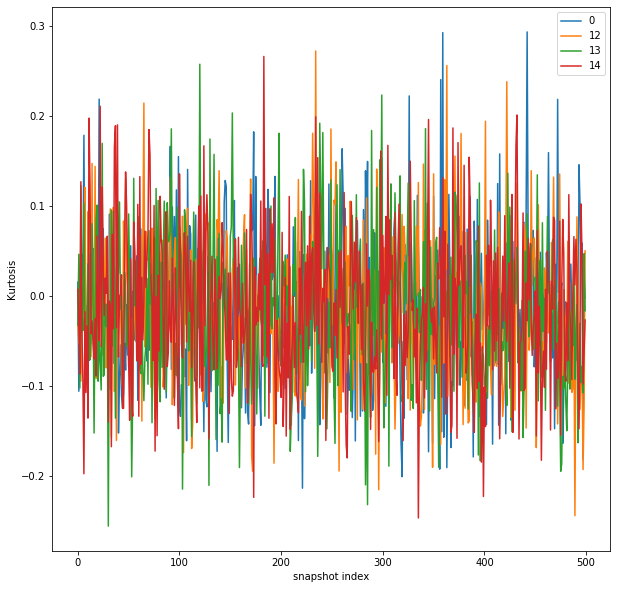

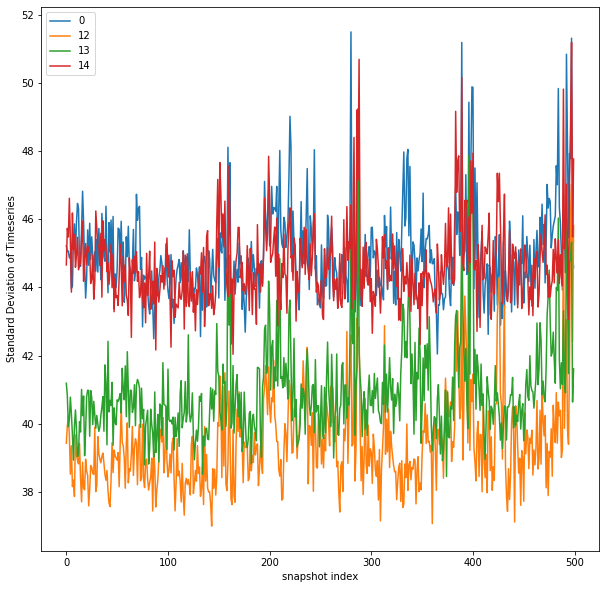

In [96]:
process_test("noplant1/",[0,12,13,14])

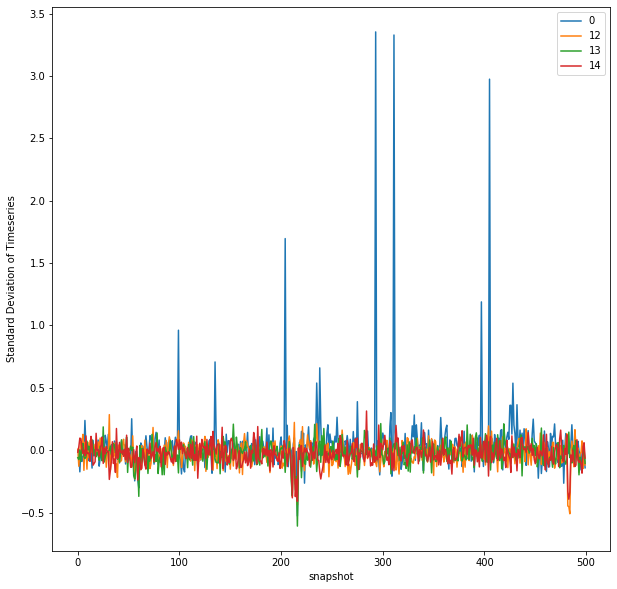

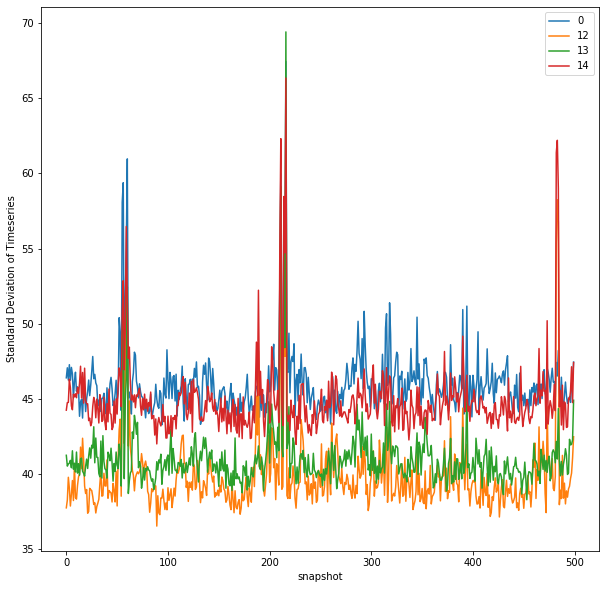

In [89]:
process_test("plant1/",[0,12,13,14])

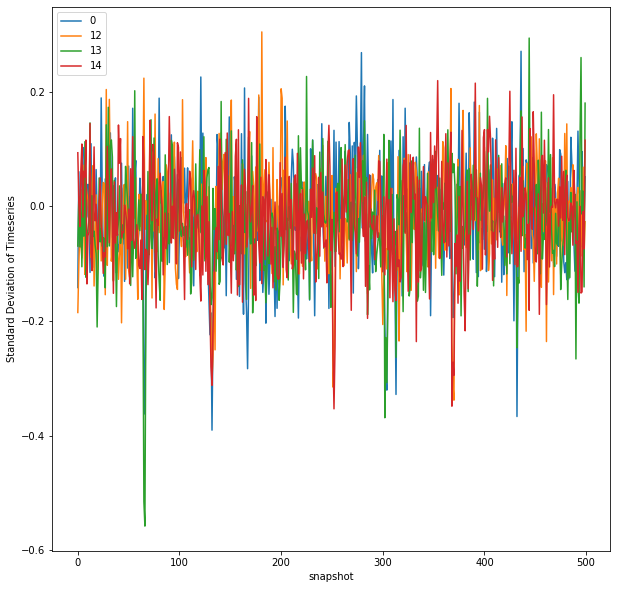

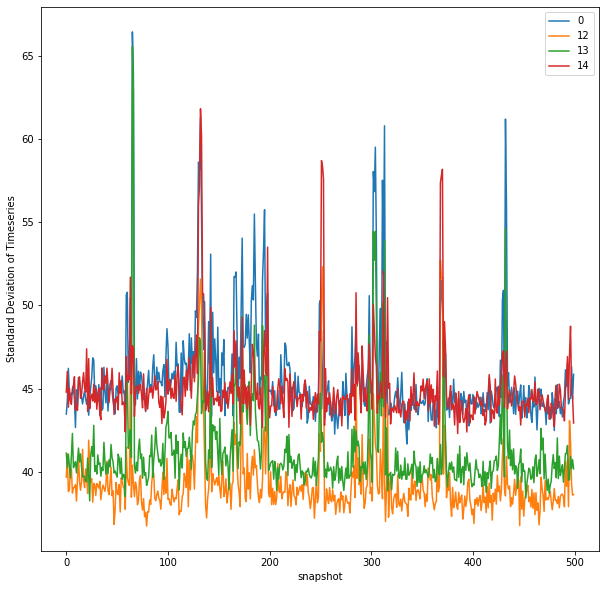

In [90]:
process_test("noplant2/",[0,12,13,14])

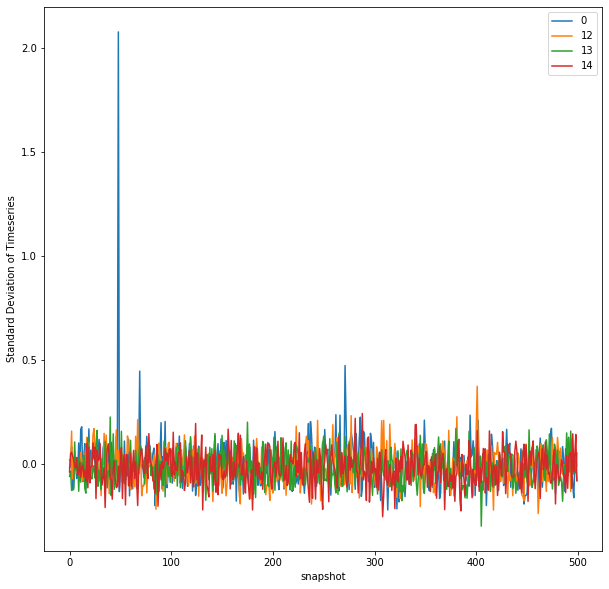

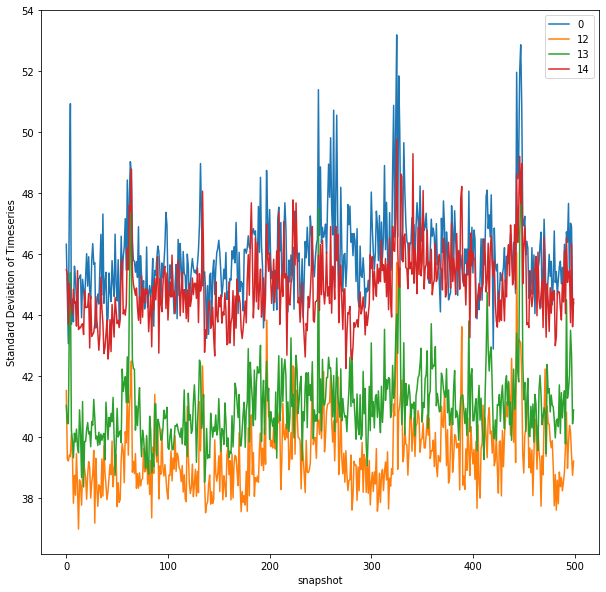

In [91]:
process_test("plant2/",[0,12,13,14])

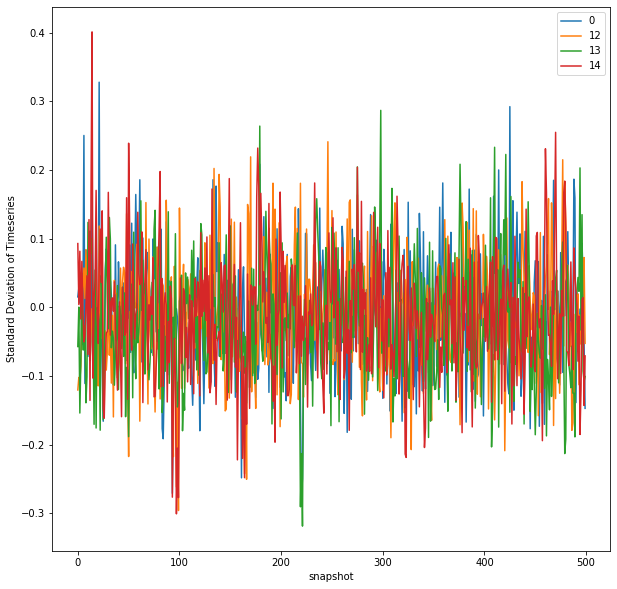

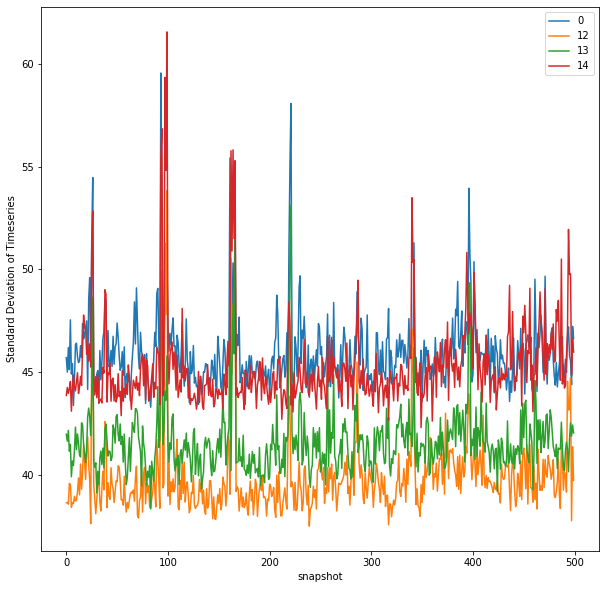

In [93]:
process_test("noplant3/",[0,12,13,14])

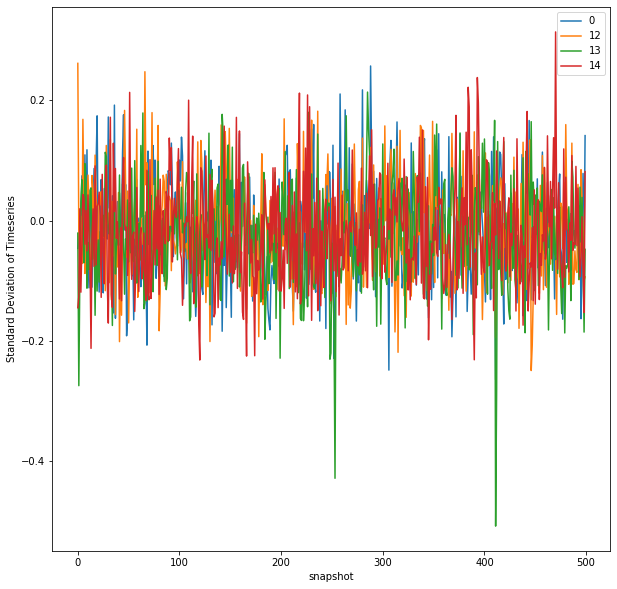

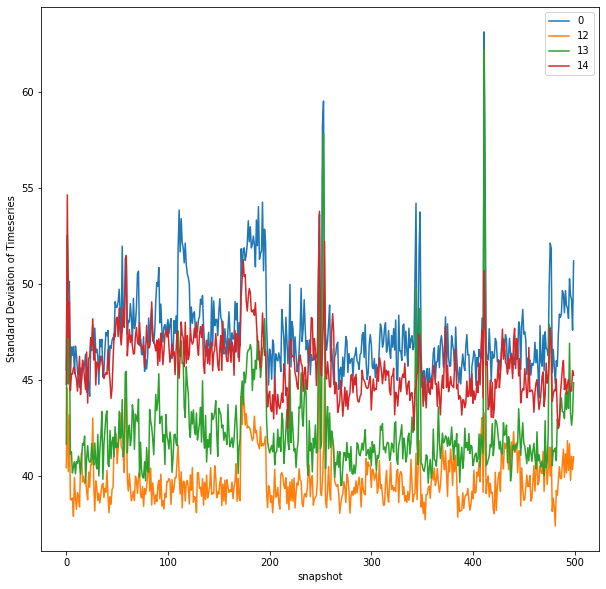

In [94]:
process_test("plant3/",[0,12,13,14])

All together

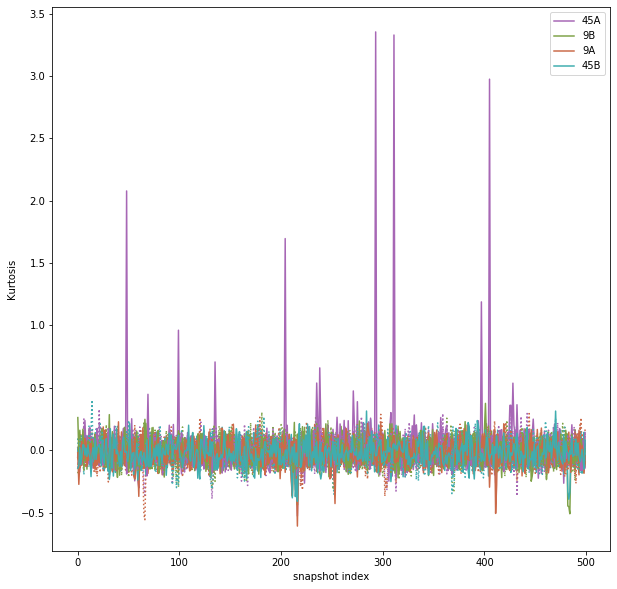

In [112]:
antennas=[0,12,13,14]
colors=["#a767b5","#7fa248","#cb6a49","#3fadaf"]
plt.figure(figsize=(10,10))

for test in ["noplant1/","plant1/","noplant2/","plant2/","noplant3/","plant3/"]:
    basedir="/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/rfbotany/"

    with open(basedir+test+"ls.txt") as f:
        fnames=f.readlines()
    basename=basedir+test
    Nant=64
    Nsnapshot=len(fnames) -1

    #kurtosis
    kurtosis=np.zeros((Nsnapshot,Nant))

    for j in range(Nsnapshot):
        fname=fnames[j+1][:-1]
        snapshot=np.load(basename+fname)
        for i in antennas:
            kurtosis[j,i]=st.kurtosis(snapshot[:,i+4])

    #standard deviations
    #sdevs=np.zeros((Nsnapshot,Nant))

    #for j in range(Nsnapshot):
     #   fname=fnames[j+1][:-1]
     #   snapshot=np.load(basename+fname)
     #   for i in antennas:
     #       sdevs[j,i]=np.std(snapshot[:,i+4])

    for e,i in enumerate(antennas):
        if test[0]=='n':
            line='dotted'
        if test[0]=='p':
            line='solid'
        if test=="plant1/": #just label antennas on the first one
            plt.plot(kurtosis[:,i],color=colors[e],label=antnames[e],linestyle=line)
        else:
            plt.plot(kurtosis[:,i],color=colors[e],linestyle=line)

plt.xlabel("snapshot index")
plt.ylabel("Kurtosis")
plt.legend()
plt.show()

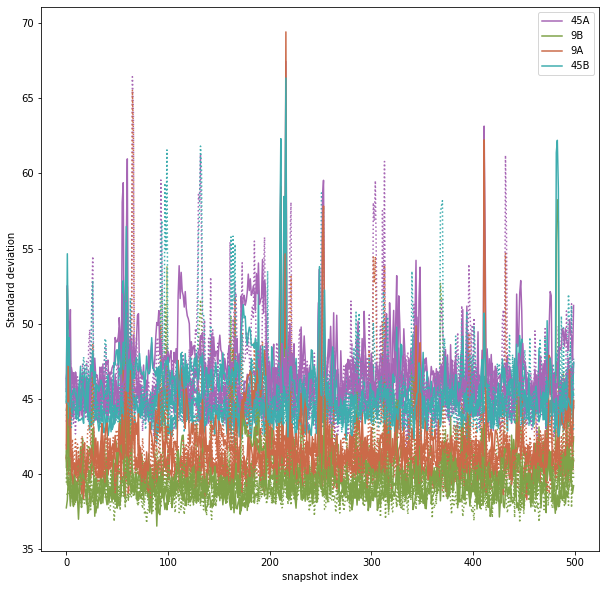

In [111]:
antennas=[0,12,13,14]
colors=["#a767b5","#7fa248","#cb6a49","#3fadaf"]
plt.figure(figsize=(10,10))

for test in ["noplant1/","plant1/","noplant2/","plant2/","noplant3/","plant3/"]:
    basedir="/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/rfbotany/"

    with open(basedir+test+"ls.txt") as f:
        fnames=f.readlines()
    basename=basedir+test
    Nant=64
    Nsnapshot=len(fnames) -1

    #kurtosis
    #kurtosis=np.zeros((Nsnapshot,Nant))

    #for j in range(Nsnapshot):
    #    fname=fnames[j+1][:-1]
    #    snapshot=np.load(basename+fname)
    #    for i in antennas:
    #        kurtosis[j,i]=st.kurtosis(snapshot[:,i+4])

    #standard deviations
    sdevs=np.zeros((Nsnapshot,Nant))

    for j in range(Nsnapshot):
        fname=fnames[j+1][:-1]
        snapshot=np.load(basename+fname)
        for i in antennas:
            sdevs[j,i]=np.std(snapshot[:,i+4])

    for e,i in enumerate(antennas):
        if test[0]=='n':
            line='dotted'
        if test[0]=='p':
            line='solid'
        if test=="plant1/": #just label antennas on the first one
            plt.plot(sdevs[:,i],color=colors[e],label=antnames[e],linestyle=line)
        else:
            plt.plot(sdevs[:,i],color=colors[e],linestyle=line)

plt.xlabel("snapshot index")
plt.ylabel("Standard deviation")
plt.legend()
plt.show()